In [430]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from collections import Counter

In [2]:
products = pd.read_csv('products.csv')
tenders = pd.read_csv('tenderModes.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
store3692 = products[products['store_code']==3692]

In [104]:
store3692.to_csv('store3692.csv')

In [52]:
tenders3692 = tenders[tenders['store_code']==3692]
del tenders

In [105]:
tenders3692.to_csv('tenders3692.csv')

In [49]:
store3692[store3692['customerID']=='BBID_2042'][store3692['transaction_number_by_till']==55053]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,transaction_number_by_till,promo_code,promotion_description,product_code,product_description,sale_price_after_promo,discountUsed
13,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,55053,NONPROMO,NaN,3.003613e+08,FB FR BANANA ROBUSTA,36.96,Payback
16,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,55053,NONPROMO,NaN,1.080375e+08,TUR DAL STD LOOSE,57.50,Payback
17,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,55053,0001189458,HO 3RS OFF CORN BASED FLAKES REG AZ EX,1.000335e+09,KELLOGGS CHOCOS VARIETY PACK 6*27g OP,57.00,Payback
18,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,55053,0001193375,NZ 20 FLAT REG Sweets,1.000082e+09,RR NAVRATRA SWEET LADDOO PP 70g,40.00,Payback
19,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,55053,NONPROMO,NaN,1.080023e+08,PH MASOOR WHOLE PP 500g,65.00,Payback
20,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,55053,NONPROMO,NaN,3.009890e+08,GH RICE BASMATI HYDERABADI BIRYANI 10kg,599.00,Payback


In [55]:
tenders3692[tenders3692['transaction_number_by_till']==55053][tenders3692['customerID']=='BBID_2042']

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,customerID,DOB,Gender,State,PinCode,transactionDate,store_code,store_description,till_no,tender_type,transaction_number_by_till,payment_amount_by_tender,PaymentUsed
10,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,PYOC,55053,382.00,Payback
11,BBID_2042,1977-07-08,female,NaN,110092,2016-10-02,3692,BB-LUDHIANA-FEROZEPUR-MF,11,EDCHDFC,55053,473.46,HDFC CREDIT CARD


In [17]:
store3692_customers = list(store3692['customerID'].unique())

We first accomplish RFM analysis on the clusters and then deal with each cluster separately

# Recency

In [38]:
store3692_recency = list()

In [39]:
from datetime import datetime
for l in store3692_customers:
    d = datetime.strptime(max(list(store3692[store3692['customerID']==l]['transactionDate'].unique())),'%Y-%m-%d')
    store3692_recency.append(12*(2017 - d.year) + (12 - d.month))

# Frequency

In [42]:
store3692_frequency = list()

In [43]:
for l in store3692_customers:
    store3692_frequency.append(store3692[store3692['customerID']==l]['transactionDate'].unique().shape)

In [45]:
store3692_freq = list()
for l in store3692_frequency:
    store3692_freq.append(l[0])

# Monetary Value

In [50]:
store3692_mv_products = list()

In [51]:
for l in store3692_customers:
    store3692_mv_products.append(store3692[store3692['customerID']==l]['sale_price_after_promo'].sum())

In [56]:
store3692_mv_tenders = list()
for l in store3692_customers:
    store3692_mv_tenders.append(tenders3692[tenders3692['customerID']==l]['payment_amount_by_tender'].sum())

Now we cluster using these RFM variables, once using monetary value obtained from products csv and once using tenders csv.

# Clustering

In [65]:
rfm_products = pd.DataFrame({'Customer_ID':store3692_customers, 'Recency':store3692_recency, 'Frequency':store3692_freq, 'Monetary Value':store3692_mv_products})

In [102]:
rfm_products.to_csv('rfm_products_store3692.csv')

In [66]:
rfm_tenders = pd.DataFrame({'Customer_ID':store3692_customers, 'Recency':store3692_recency, 'Frequency':store3692_freq, 'Monetary Value':store3692_mv_tenders})

In [103]:
rfm_tenders.to_csv('rfm_tenders_store3692.csv')

In [79]:
rfm_products.drop(['Customer_ID', 'Label'], axis=1, inplace=True)

In [91]:
rbs = RobustScaler()
rfm_products2 = rbs.fit_transform(rfm_products)
    
km1 = KMeans(n_clusters=4)
km2 = km1.fit(rfm_products2)
label = km2.predict(rfm_products2)
    
silhouette_score(rfm_products2, label)
#cluster_score.append(s_score)
    
#cluster_labels.append(label)
#cluster_store.append(np.repeat(x, cld.shape[0]))
#cluster_data.append(cld2)

0.63092788339759631

We see that recency has very little effect, so we remove it from the RFM clustering clause.

In [382]:
rfm_products.drop(['Recency', 'Label', 'Customer_ID', 'MV by Tenders'], axis=1, inplace=True)

In [386]:
rbs = RobustScaler()
rfm_products2 = rbs.fit_transform(rfm_products)
    
km1 = KMeans(n_clusters=4)
km2 = km1.fit(rfm_products2)
label = km2.predict(rfm_products2)
    
silhouette_score(rfm_products2, label)

0.69905329010770878

In [388]:
rfm_products['Recency'] = store3692_recency
rfm_products['Label'] = label
rfm_products['Customer_ID'] = store3692_customers
rfm_products['MV by Tenders'] = store3692_mv_tenders

In [389]:
100*(rfm_products['Label'].value_counts()/rfm_products.shape[0])

0    85.433884
3    12.768595
1     1.322314
2     0.475207
Name: Label, dtype: float64

In [469]:
rfm_products_cluster0 = rfm_products[rfm_products['Label']==0]
rfm_products_cluster1 = rfm_products[rfm_products['Label']==1]
rfm_products_cluster2 = rfm_products[rfm_products['Label']==2]
rfm_products_cluster3 = rfm_products[rfm_products['Label']==3]

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [391]:
print("Cluster 0")
print(rfm_products_cluster0.describe())
print("Cluster 1")
print(rfm_products_cluster1.describe())
print("Cluster 2")
print(rfm_products_cluster2.describe())
print("Cluster 3")
print(rfm_products_cluster3.describe())

Cluster 0
         Frequency  Monetary Value      Recency   Label  MV by Tenders
count  8270.000000     8270.000000  8270.000000  8270.0    8270.000000
mean      1.858646     3963.606057    10.483192     0.0    3504.780437
std       1.188374     4012.747109     4.842159     0.0    3996.403600
min       1.000000    -1946.000000     6.000000     0.0   -1946.000000
25%       1.000000     1044.000000     6.000000     0.0     556.925000
50%       1.000000     2709.785000     8.000000     0.0    2197.850000
75%       2.000000     5591.347500    14.000000     0.0    5144.910000
max       7.000000    34646.840000    26.000000     0.0   34646.900000
Cluster 1
        Frequency  Monetary Value     Recency  Label  MV by Tenders
count  128.000000      128.000000  128.000000  128.0     128.000000
mean    25.812500    20001.629141    7.718750    1.0   17899.456484
std      8.391738    14784.347051    2.129425    0.0   15548.922555
min     18.000000     2127.670000    6.000000    1.0       0.000000
2

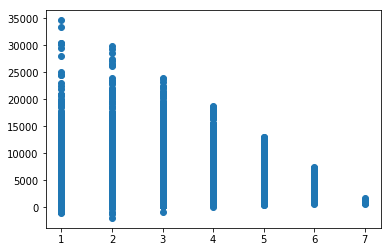

In [392]:
plt.scatter(rfm_products_cluster0['Frequency'], rfm_products_cluster0['Monetary Value'])

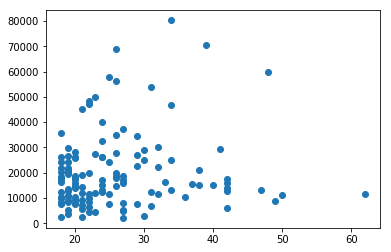

In [393]:
plt.scatter(rfm_products_cluster1['Frequency'], rfm_products_cluster1['Monetary Value'])

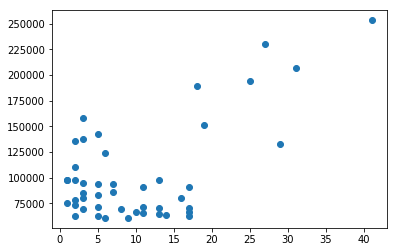

In [394]:
plt.scatter(rfm_products_cluster2['Frequency'], rfm_products_cluster2['Monetary Value'])

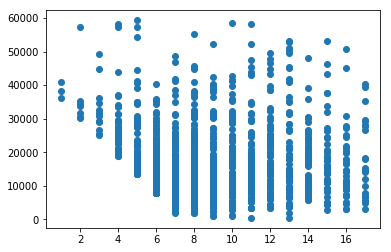

In [395]:
plt.scatter(rfm_products_cluster3['Frequency'], rfm_products_cluster3['Monetary Value'])

In [396]:
print("MV by price after promo is {}", format(rfm_products_cluster0['Monetary Value'].sum()/rfm_products['Monetary Value'].sum()))
print("MV by price after promo is {}", format(rfm_products_cluster0['MV by Tenders'].sum()/rfm_products['MV by Tenders'].sum()))

('MV by price after promo is {}', '0.532713224496')
('MV by price after promo is {}', '0.52548701276')


In [397]:
print("MV by price after promo is {}", format(rfm_products_cluster1['Monetary Value'].sum()/rfm_products['Monetary Value'].sum()))
print("MV by price after promo is {}", format(rfm_products_cluster1['MV by Tenders'].sum()/rfm_products['MV by Tenders'].sum()))

('MV by price after promo is {}', '0.0416076153112')
('MV by price after promo is {}', '0.04153798977')


In [398]:
print("MV by price after promo is {}", format(rfm_products_cluster2['Monetary Value'].sum()/rfm_products['Monetary Value'].sum()))
print("MV by price after promo is {}", format(rfm_products_cluster2['MV by Tenders'].sum()/rfm_products['MV by Tenders'].sum()))

('MV by price after promo is {}', '0.0767316635784')
('MV by price after promo is {}', '0.0845074668765')


In [399]:
print("MV by price after promo is {}", format(rfm_products_cluster3['Monetary Value'].sum()/rfm_products['Monetary Value'].sum()))
print("MV by price after promo is {}", format(rfm_products_cluster3['MV by Tenders'].sum()/rfm_products['MV by Tenders'].sum()))

('MV by price after promo is {}', '0.348947496615')
('MV by price after promo is {}', '0.348467530594')


So now we have 4 clusters, where-
1. Cluster 0 has people spending in the bracket 0-35k and frequencies less than 7. The mean frequency is almost close to 2, which means these are not frequent buyers. Their monetary value is less as well, with mean around 4k. However they make up 85% of the customers, which is in line with Pareto's principle. However knowing this demographic will enable us differentiate between a frequent customer and a non-frequent one.
2. Cluster 3 has people spending in the bracket 0-60k and frequencies upto 16. With mean frequency around 9 and monetary value of 17k, they are one signifiant bunch of customers.
3. Cluster 1 are even more frequent buyers, with monetary values having a mean of 20k, spending ranges of 0-80k and frequency mean of 25 with 75% of customers visiting with frequencies of 29.
4. Final cluster, Cluster 2 are the high spending bracket customers, with monetary values having mean above a lakh and frequencies around 9-16.

What clusters 1,2 and 3 mean for FG - Cluster 2 and 3 visit BB maybe around once every 3 months, while cluster 1 seems to be a monthly visitor. Now it needs to be seen when people of these clusters visit usually.

Now we will see when people of cluster 0, 1, 2 and 3 visit, which promo they have, which discount method they use and which payment method they use.

One more thing, unlike Pareto principle, the price after promo's sum and price after discount's sum for cluster 0 are over 50%, that is cluster 0 contributes almost half of the sales in store code 3692.

Since products csv based RFM and tenders csv based RFM show similar statistical behaviour, we do not repeat the process for tenders.

In [400]:
rfm_products_cluster0_customers = list(rfm_products_cluster0['Customer_ID'])
rfm_products_cluster1_customers = list(rfm_products_cluster1['Customer_ID'])
rfm_products_cluster2_customers = list(rfm_products_cluster2['Customer_ID'])
rfm_products_cluster3_customers = list(rfm_products_cluster3['Customer_ID'])

For us, cluster 1 are the loyal ones who seem to come mainly for groceries(will check in a bit). Cluster 2 and 3 needs to be targetted for more frequent visits as they are seemingly regular but we would love to have them in cluster 1. Also cluster 1 should be harvested for higher profits. Understanding cluster 0 will enable us to recognise the low loyalty people who visit occasionally and have monetary value less as well.

Now we first study the age, month, dow based demographics.

# Age and Shopping frequency by month and day of week 

In [402]:
store3692_cluster0 = store3692[store3692.customerID.isin(rfm_products_cluster0_customers)]
store3692_cluster1 = store3692[store3692.customerID.isin(rfm_products_cluster1_customers)]
store3692_cluster2 = store3692[store3692.customerID.isin(rfm_products_cluster2_customers)]
store3692_cluster3 = store3692[store3692.customerID.isin(rfm_products_cluster3_customers)]

Cluster 0

In [403]:
age_cluster0 = list()
for l in rfm_products_cluster0_customers:
    try:
        d = datetime.strptime(max(list(store3692_cluster0[store3692_cluster0['customerID']==l]['DOB'].unique())),'%Y-%m-%d')
        age_cluster0.append(2017-d.year)
    except ValueError:
        age_cluster0.append(0)

month_cluster0 = list()
for l in store3692_cluster0['transactionDate']:
    month_cluster0.append(datetime.strptime(l,'%Y-%m-%d').month)
    
dow_cluster0 = list()
for l in store3692_cluster0['transactionDate']:
    dow_cluster0.append(datetime.strptime(l,'%Y-%m-%d').weekday())

In [411]:
age_cluster0 = [np.mean(age_cluster0) if x==0 else x for x in age_cluster0]

Cluster 1

In [415]:
age_cluster1 = list()
for l in rfm_products_cluster1_customers:
    try:
        d = datetime.strptime(max(list(store3692_cluster1[store3692_cluster1['customerID']==l]['DOB'].unique())),'%Y-%m-%d')
        age_cluster1.append(2017-d.year)
    except ValueError:
        age_cluster1.append(0)

month_cluster1 = list()
for l in store3692_cluster1['transactionDate']:
    month_cluster1.append(datetime.strptime(l,'%Y-%m-%d').month)
    
dow_cluster1 = list()
for l in store3692_cluster1['transactionDate']:
    dow_cluster1.append(datetime.strptime(l,'%Y-%m-%d').weekday())
    
age_cluster1 = [np.mean(age_cluster1) if x==0 else x for x in age_cluster1]

Cluster 2

In [419]:
age_cluster2 = list()
for l in rfm_products_cluster2_customers:
    try:
        d = datetime.strptime(max(list(store3692_cluster2[store3692_cluster2['customerID']==l]['DOB'].unique())),'%Y-%m-%d')
        age_cluster2.append(2017-d.year)
    except ValueError:
        age_cluster2.append(0)

month_cluster2 = list()
for l in store3692_cluster2['transactionDate']:
    month_cluster2.append(datetime.strptime(l,'%Y-%m-%d').month)
    
dow_cluster2 = list()
for l in store3692_cluster2['transactionDate']:
    dow_cluster2.append(datetime.strptime(l,'%Y-%m-%d').weekday())
    
age_cluster2 = [np.mean(age_cluster2) if x==0 else x for x in age_cluster2]

Cluster 3

In [423]:
age_cluster3 = list()
for l in rfm_products_cluster3_customers:
    try:
        d = datetime.strptime(max(list(store3692_cluster3[store3692_cluster3['customerID']==l]['DOB'].unique())),'%Y-%m-%d')
        age_cluster3.append(2017-d.year)
    except ValueError:
        age_cluster3.append(0)

month_cluster3 = list()
for l in store3692_cluster3['transactionDate']:
    month_cluster3.append(datetime.strptime(l,'%Y-%m-%d').month)
    
dow_cluster3 = list()
for l in store3692_cluster3['transactionDate']:
    dow_cluster3.append(datetime.strptime(l,'%Y-%m-%d').weekday())
    
age_cluster3 = [np.mean(age_cluster3) if x==0 else x for x in age_cluster3]

# Age demographics of clusters

(array([  33.,  247.,  369.,  282.,  159.,   89.,   46.,    4.,    0.,    7.]),
 array([  12. ,   21.5,   31. ,   40.5,   50. ,   59.5,   69. ,   78.5,
          88. ,   97.5,  107. ]),
 <a list of 10 Patch objects>)

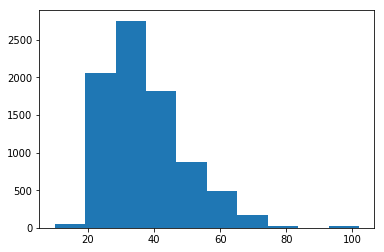

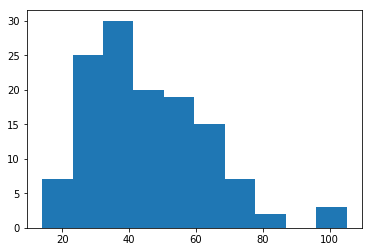

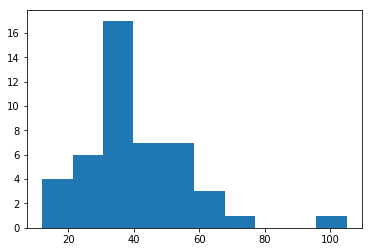

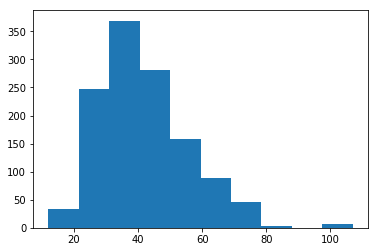

In [427]:
plt.figure(1)
plt.hist(age_cluster0)
plt.figure(2)
plt.hist(age_cluster1)
plt.figure(3)
plt.hist(age_cluster2)
plt.figure(4)
plt.hist(age_cluster3)


For cluster 2, it is clearly dominated with people in age group 30-40, that means they might be families mainly(since spending high, so probably married with one or more salaried persons). For the other three clusters, there are significant portions of people in age group 20-30 and 40-60. Studying them will give some more insights about the customer behaviour. Since cluster 1 has only 128 people, with decent spending amounts, these can be attributed to again single or married households(salaried as well). Same can be said for cluster 3 with 1236 members mostly in the range 20-60. So these seem to be salaried people. Cluster 0 needs to be explored some more.

# Spending frequency by month

(array([ 26345.,  14199.,  17574.,  16678.,  17096.,   8635.,   8710.,
          6373.,   8295.,  20939.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

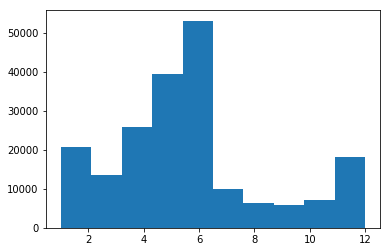

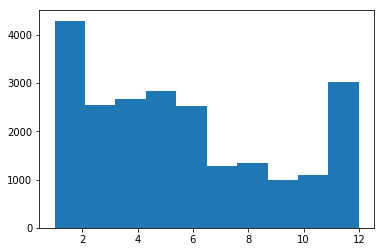

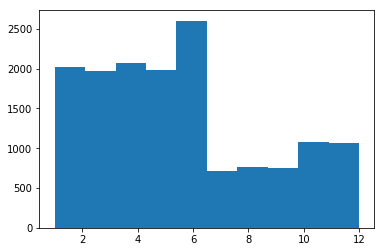

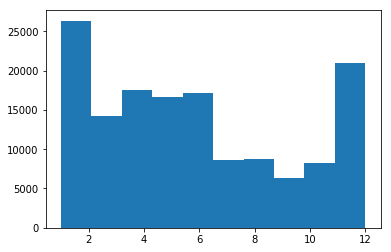

In [428]:
plt.figure(1)
plt.hist(month_cluster0)
plt.figure(2)
plt.hist(month_cluster1)
plt.figure(3)
plt.hist(month_cluster2)
plt.figure(4)
plt.hist(month_cluster3)

There is a dip in purchase in the second half of the year, but for clusters 1 and 3, there has been a surge in purchase in Jan and December. For cluster 0, there has been a slight surge in Jan and Dec but more surge in June and July. For cluster 2, there has been a consistent purchase in first months with surge in June. So in the perspective of business, we can say-
1. Cluster 0 with surge in June and July.
2. Cluster 2 with consistent first half, surge in July and then slight surge in December.
3. Clusters 1 and 3 are similar, with surge in Jan and Dec.

# Spending frequency by DOW

(array([ 13645.,  13087.,      0.,  25257.,      0.,  14197.,  14178.,
             0.,  23063.,  41417.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

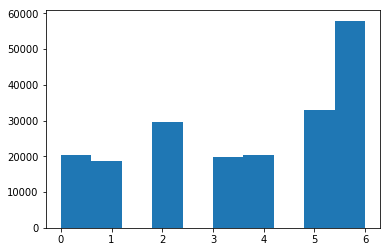

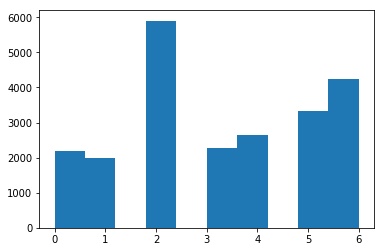

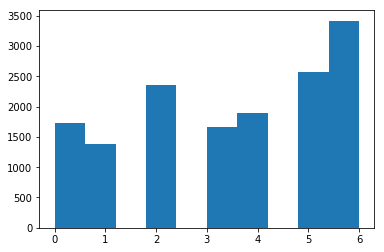

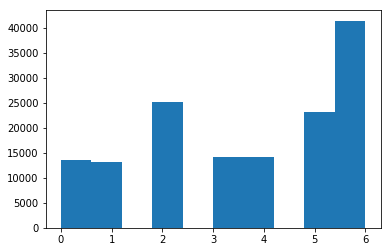

In [429]:
plt.figure(1)
plt.hist(dow_cluster0)
plt.figure(2)
plt.hist(dow_cluster1)
plt.figure(3)
plt.hist(dow_cluster2)
plt.figure(4)
plt.hist(dow_cluster3)

Wednesday being a day with offers has in general higher sales than the rest of the weekdays, but cluster 1 shows unexpectedly high sales on that day. Maybe that explains why with even high frequencies, they have lower monetary value. In general sales on weekends is higher than weekdays which is justified for cluster 1 and 3 as they have more salaried people as argued above. Cluster 0 needs more analysis.

# Clustering using discount used and payment used

Now we work using cluster 0 only. We find that tender used isn't that understandable in business terms so we avoided that and instead looked into the payment used. If credit card used, that means person or his family members are employed.

In [274]:
store3692_cluster0 = store3692[store3692.customerID.isin(rfm_products_cluster0_customers)]

In [444]:
tenders3692_cluster0  = tenders3692[tenders3692.customerID.isin(rfm_products_cluster0_customers)]

In [458]:
Payback = list()
BBProfitClub = list()
T24Club = list()
BBSavingsClub = list()
FGShoppingFest = list()
EldersClub = list()
CreditCard = list()
CashorNot = list()
PaymentUsed = list(tenders3692_cluster0['PaymentUsed'])
for l in store3692_cluster0['discountUsed']:
    if 'Payback' in l:
        Payback.append(1)
    else:
        Payback.append(0)

for l in store3692_cluster0['discountUsed']:
    if 'BBProfitClub' in l:
        BBProfitClub.append(1)
    else:
        BBProfitClub.append(0)

for l in store3692_cluster0['discountUsed']:
    if 'BBSavingsClub' in l:
        BBSavingsClub.append(1)
    else:
        BBSavingsClub.append(0)

for l in store3692_cluster0['discountUsed']:
    if 'T24Club' in l:
        T24Club.append(1)
    else:
        T24Club.append(0)
        
for l in store3692_cluster0['discountUsed']:
    if 'FGShoppingFest' in l:
        FGShoppingFest.append(1)
    else:
        FGShoppingFest.append(0)
        
for l in store3692_cluster0['discountUsed']:
    if 'EldersClub' in l:
        EldersClub.append(1)
    else:
        EldersClub.append(0)
        
for l in PaymentUsed:
    if 'CREDIT CARD' in str(l):
        CreditCard.append(1)
    else:
        CreditCard.append(0)
        
for l in PaymentUsed:
    if 'CASH' in str(l):
        CashorNot.append(1)
    else:
        CashorNot.append(0)

In [459]:
print("Payback count is {}".format(Counter(Payback)))
print("BBProfitClub count is {}".format(Counter(BBProfitClub)))
print("BBSavingsClub count is {}".format(Counter(BBSavingsClub)))
print("T24Club count is {}".format(Counter(T24Club)))
print("FGShoppingFest count is {}".format(Counter(FGShoppingFest)))
print("EldersClub count is {}".format(Counter(EldersClub)))
print("CreditCard count is {}".format(Counter(CreditCard)))
print("CashorNot count is {}".format(Counter(CashorNot)))

Payback count is Counter({1: 130118, 0: 70069})
BBProfitClub count is Counter({0: 167639, 1: 32548})
BBSavingsClub count is Counter({0: 131038, 1: 69149})
T24Club count is Counter({0: 190918, 1: 9269})
FGShoppingFest count is Counter({0: 199392, 1: 795})
EldersClub count is Counter({0: 200169, 1: 18})
CreditCard count is Counter({0: 15327, 1: 5431})
CashorNot count is Counter({0: 12737, 1: 8021})


In [460]:
store3692_cluster0['Payback'] = Payback
store3692_cluster0['BBProfitClub'] = BBProfitClub
store3692_cluster0['BBSavingsClub'] = BBSavingsClub
store3692_cluster0['T24Club'] = T24Club
store3692_cluster0['FGShoppingFest'] = FGShoppingFest
store3692_cluster0['EldersClub'] = EldersClub
tenders3692_cluster0['CashorNot'] = CashorNot
tenders3692_cluster0['CreditCard'] = CreditCard

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [461]:
payback_cluster0 = list()
bbprofit_cluster0 = list()
bbsavings_cluster0 = list()
t24_cluster0 = list()
fgshopping_cluster0 = list()
elders_cluster0 = list()
creditcard_cluster0 = list()
cashornot_cluster0 = list()

In [462]:
for l in rfm_products_cluster0_customers:
    payback_cluster0.append(store3692_cluster0[store3692_cluster0['customerID']==l]['Payback'].sum())
    bbprofit_cluster0.append(store3692_cluster0[store3692_cluster0['customerID']==l]['BBProfitClub'].sum())
    bbsavings_cluster0.append(store3692_cluster0[store3692_cluster0['customerID']==l]['BBSavingsClub'].sum())
    t24_cluster0.append(store3692_cluster0[store3692_cluster0['customerID']==l]['T24Club'].sum())
    fgshopping_cluster0.append(store3692_cluster0[store3692_cluster0['customerID']==l]['FGShoppingFest'].sum())
    elders_cluster0.append(store3692_cluster0[store3692_cluster0['customerID']==l]['EldersClub'].sum())
    creditcard_cluster0.append(tenders3692_cluster0[tenders3692_cluster0['customerID']==l]['CreditCard'].sum())
    cashornot_cluster0.append(tenders3692_cluster0[tenders3692_cluster0['customerID']==l]['CashorNot'].sum())

In [470]:
rfm_products_cluster0['Payback'] = payback_cluster0
rfm_products_cluster0['BBProfitClub'] = bbprofit_cluster0
rfm_products_cluster0['BBSavingsClub'] = bbsavings_cluster0
rfm_products_cluster0['T24Club'] = t24_cluster0
rfm_products_cluster0['FGShoppingFest'] = fgshopping_cluster0
rfm_products_cluster0['EldersClub'] = elders_cluster0
rfm_products_cluster0['CreditCard'] = creditcard_cluster0
rfm_products_cluster0['CashorNot'] = cashornot_cluster0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

We cluster in the following sequence-
1. Recency
2. CreditCard and Cashornot
3. Discounts used

In [471]:
rfm_products_cluster0

,Frequency,Monetary Value,Recency,Label,Customer_ID,MV by Tenders,Payback,BBProfitClub,BBSavingsClub,T24Club,FGShoppingFest,EldersClub,CreditCard,CashorNot
0,2,1755.46,14,0,BBID_2042,1755.46,8,0,0,0,0,0,1,1
1,1,240.60,9,0,BBID_20475,0.00,4,0,0,0,0,0,0,0
3,2,2015.84,9,0,BBID_204154,2015.84,30,0,0,0,0,0,2,0
4,1,2799.84,8,0,BBID_204186,2799.84,7,0,0,0,0,0,0,1
6,1,3455.01,14,0,BBID_204220,3455.01,27,0,0,0,0,0,1,0
7,1,1672.23,20,0,BBID_204265,1672.23,14,0,0,0,0,0,1,0
8,1,1734.00,12,0,BBID_204302,1734.00,11,0,0,0,0,0,1,0
9,5,8522.92,7,0,BBID_204323,0.00,74,0,0,0,0,0,0,0
10,3,1133.20,8,0,BBID_204399,1133.20,20,0,0,0,0,0,3,0
11,5,11663.07,6,0,BBID_204482,0.00,92,0,0,0,0,0,0,0


# Recency

In [477]:
#rfm_products_cluster0.drop(['Frequency', 'Monetary Value', 'Label', 'Customer_ID', 'MV by Tenders', 'Payback', 'BBProfitClub', 'BBSavingsClub', 'T24Club', 'FGShoppingFest', 'EldersClub', 'CreditCard', 'CashorNot'], axis=1, inplace=True)
rbs = RobustScaler()
rfm_2 = rbs.fit_transform(rfm_products_cluster0)
    
km1 = KMeans(n_clusters=2)
km2 = km1.fit(rfm_2)
label_recency = km2.predict(rfm_2)
    
silhouette_score(rfm_2, label_recency)

0.72073984150491532

In [490]:
rfm_products_cluster0 = rfm_products[rfm_products['Label']==0]
rfm_products_cluster0['Payback'] = payback_cluster0
rfm_products_cluster0['BBProfitClub'] = bbprofit_cluster0
rfm_products_cluster0['BBSavingsClub'] = bbsavings_cluster0
rfm_products_cluster0['T24Club'] = t24_cluster0
rfm_products_cluster0['FGShoppingFest'] = fgshopping_cluster0
rfm_products_cluster0['EldersClub'] = elders_cluster0
rfm_products_cluster0['CreditCard'] = creditcard_cluster0
rfm_products_cluster0['CashorNot'] = cashornot_cluster0
rfm_products_cluster0['LabelRecency'] = label_recency
rfm_products_cluster0['Age'] = age_cluster0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [491]:
rfm_products_cluster0_0 = rfm_products_cluster0[rfm_products_cluster0['LabelRecency']==0]
rfm_products_cluster0_1 = rfm_products_cluster0[rfm_products_cluster0['LabelRecency']==1]
print("Cluster 0 of Cluster 0")
print(rfm_products_cluster0_0.describe())
print("Cluster 1 of Cluster 0")
print(rfm_products_cluster0_1.describe())

Cluster 0 of Cluster 0
         Frequency  Monetary Value      Recency   Label  MV by Tenders  \
count  5764.000000     5764.000000  5764.000000  5764.0    5764.000000   
mean      2.046149     4512.850767     7.647988     0.0    4030.054424   
std       1.264288     4081.719749     1.798970     0.0    4144.123106   
min       1.000000    -1946.000000     6.000000     0.0   -1946.000000   
25%       1.000000     1451.000000     6.000000     0.0     804.562500   
50%       2.000000     3403.610000     7.000000     0.0    2877.405000   
75%       3.000000     6499.552500     8.000000     0.0    5984.925000   
max       7.000000    34646.840000    12.000000     0.0   34646.900000   

           Payback  BBProfitClub  BBSavingsClub      T24Club  FGShoppingFest  \
count  5764.000000   5764.000000    5764.000000  5764.000000          5764.0   
mean     15.672970      4.253990      11.996704     1.099931             0.0   
std      22.232217     13.826797      24.663162     6.622076          

Now cluster 1 has mainly those people who have visited back a long time ago so they aren't of our interest. The ones in our business interest lies in cluster 0 as they have visited recently. Now we deal with second clustering using payment mode used. Since cash and credit cards are somewhat different as the ones with credit card probably have a sound earning for sure, we cluster using these to check the results.

# Creditcard or cashornot

In [485]:
#rfm_products_cluster0_0.drop(['Frequency', 'Monetary Value', 'Label', 'Customer_ID', 'MV by Tenders', 'Payback', 'BBProfitClub', 'BBSavingsClub', 'T24Club', 'FGShoppingFest', 'EldersClub', 'LabelRecency'], axis=1, inplace=True)
rbs = RobustScaler()
rfm_3 = rbs.fit_transform(rfm_products_cluster0_0)
    
km1 = KMeans(n_clusters=3)
km2 = km1.fit(rfm_3)
label_payment = km2.predict(rfm_3)
    
silhouette_score(rfm_3, label_payment)

0.37603357641256319

In [492]:
rfm_products_cluster0_0 = rfm_products_cluster0[rfm_products_cluster0['LabelRecency']==0]
rfm_products_cluster0_0['LabelPayment'] = label_payment
rfm_products_cluster0_0_0 = rfm_products_cluster0_0[rfm_products_cluster0_0['LabelPayment']==0]
rfm_products_cluster0_0_1 = rfm_products_cluster0_0[rfm_products_cluster0_0['LabelPayment']==1]
rfm_products_cluster0_0_2 = rfm_products_cluster0_0[rfm_products_cluster0_0['LabelPayment']==2]
print("Cluster 0 of Cluster 0 of Cluster 0")
print(rfm_products_cluster0_0_0.describe())
print("Cluster 1 of Cluster 0 of Cluster 0")
print(rfm_products_cluster0_0_1.describe())
print("Cluster 2 of Cluster 0 of Cluster 0")
print(rfm_products_cluster0_0_2.describe())

Cluster 0 of Cluster 0 of Cluster 0
        Frequency  Monetary Value     Recency  Label  MV by Tenders  \
count  969.000000      969.000000  969.000000  969.0     969.000000   
mean     2.890609     6399.597647    7.527348    0.0    6399.646223   
std      1.227443     4339.634505    1.847358    0.0    4339.626258   
min      1.000000      202.500000    6.000000    0.0     202.500000   
25%      2.000000     2885.640000    6.000000    0.0    2885.640000   
50%      3.000000     5418.070000    7.000000    0.0    5418.070000   
75%      4.000000     8836.000000    8.000000    0.0    8836.000000   
max      7.000000    28644.260000   12.000000    0.0   28644.260000   

          Payback  BBProfitClub  BBSavingsClub     T24Club  FGShoppingFest  \
count  969.000000    969.000000     969.000000  969.000000           969.0   
mean    28.367389      3.660475      17.822497    1.920537             0.0   
std     29.203780     15.311480      32.152424    9.450659             0.0   
min      0.0

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


(array([  3.70000000e+01,   8.17000000e+02,   1.16300000e+03,
          8.02000000e+02,   3.85000000e+02,   1.76000000e+02,
          8.80000000e+01,   1.20000000e+01,   1.00000000e+00,
          1.00000000e+01]),
 array([  11.,   20.,   29.,   38.,   47.,   56.,   65.,   74.,   83.,
          92.,  101.]),
 <a list of 10 Patch objects>)

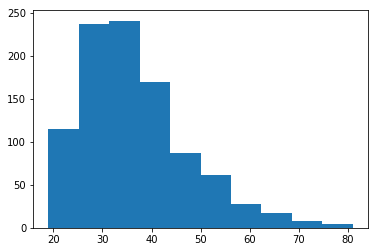

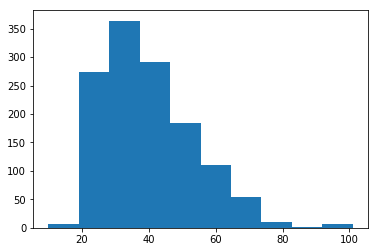

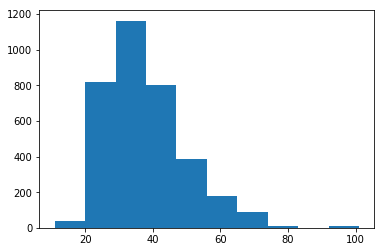

In [493]:
plt.figure(1)
plt.hist(rfm_products_cluster0_0_0['Age'])
plt.figure(2)
plt.hist(rfm_products_cluster0_0_1['Age'])
plt.figure(3)
plt.hist(rfm_products_cluster0_0_2['Age'])

Cluster 0 is credit card dominant and cluster 1 is cash dominant. Cluster 0 has a slightly more younger generation than cluster 1. Monetarily, cluster 2 seems the one with lower number of salaried people. Cluster 0 has slightly higher monetary value than 1, with both having significantly higher value than cluster 2. So we focus on cluster 0 and 1, who need to be further focussed upon for better future sales.

# Discount Used

In [499]:
#rfm_products_cluster0_0_0.drop(['Frequency', 'Monetary Value', 'Label', 'Customer_ID', 'MV by Tenders','CreditCard', 'CashorNot', 'LabelPayment','Age', 'LabelRecency'], axis=1, inplace=True)
rbs = RobustScaler()
rfm_4 = rbs.fit_transform(rfm_products_cluster0_0_0)
    
km1 = KMeans(n_clusters=3)
km2 = km1.fit(rfm_4)
label_discount = km2.predict(rfm_4)
    
silhouette_score(rfm_4, label_discount)

0.8893502545917058

In [500]:
rfm_products_cluster0_0_0 = rfm_products_cluster0_0[rfm_products_cluster0_0['LabelPayment']==0]

In [502]:
rfm_products_cluster0_0_0['LabelDiscount'] = label_discount
rfm_products_cluster0_0_0_0 = rfm_products_cluster0_0_0[rfm_products_cluster0_0_0['LabelDiscount']==0]
rfm_products_cluster0_0_0_1 = rfm_products_cluster0_0_0[rfm_products_cluster0_0_0['LabelDiscount']==1]
rfm_products_cluster0_0_0_2 = rfm_products_cluster0_0_0[rfm_products_cluster0_0_0['LabelDiscount']==2]
print("Cluster 0 of Cluster 0 of Cluster 0 of Cluster 0")
print(rfm_products_cluster0_0_0_0.describe())
print("Cluster 1 of Cluster 0 of Cluster 0 of Cluster 0")
print(rfm_products_cluster0_0_0_1.describe())
print("Cluster 2 of Cluster 0 of Cluster 0 of Cluster 0")

print(rfm_products_cluster0_0_0_2.describe())

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Cluster 0 of Cluster 0 of Cluster 0 of Cluster 0
        Frequency  Monetary Value     Recency  Label  MV by Tenders  \
count  895.000000      895.000000  895.000000  895.0     895.000000   
mean     2.824581     6212.464279    7.521788    0.0    6212.516782   
std      1.206553     4348.995319    1.853507    0.0    4348.988635   
min      1.000000      202.500000    6.000000    0.0     202.500000   
25%      2.000000     2752.875000    6.000000    0.0    2752.875000   
50%      3.000000     5090.810000    7.000000    0.0    5090.810000   
75%      4.000000     8593.000000    8.000000    0.0    8593.000000   
max      7.000000    28644.260000   12.000000    0.0   28644.260000   

          Payback  BBProfitClub  BBSavingsClub     T24Club  FGShoppingFest  \
count  895.000000    895.000000     895.000000  895.000000           895.0   
mean    27.798883      0.463687      18.268156    0.425698             0.0   
std     28.697212      3.205590      32.615234    2.440525             0.0   

# Cluster analysis of cluster 3 with name, religion, marital status, age and product preferences

Work to be done -
1. from name, understand religion
2. from region, understand community, income, cosmopolitan or rooted attitude
3. from spending patterns and products, important or non important purchases, life stages, salaried or self emplyed, married, kids or no kids
4. from discount type and tender type, understand digitally sound, which card more used
5. rfm data done, but reject r
6. some behavorial understanding from dow, month, age etc.
7. Low freq low recency age distribution

# Name based religion

In [530]:
names = pd.read_csv('customer_name_maps.csv')
import urllib2 
import time
names_cluster3 = names[names.customerID.isin(rfm_products_cluster3_customers)]
first_name = list(names_cluster3['first_name'])
last_name = list(names_cluster3['last_name'])
religion = list()
for l in range(len(first_name)):
    url = urllib2.urlopen("http://abel.lis.illinois.edu/cgi-bin/ethnea/search.py?Fname=" + first_name[l] + "&Lname=" +last_name[l] +"&format=json")
    if(l%10==0):
        time.sleep(1)
        print l
    content = url.read()
    if 'INDIAN' in content:
        religion.append('Hindu/Sikh')
    elif 'ARAB' in content:
        religion.append('Muslim')
    else:
        religion.append('Christian/Jew')

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230


In [531]:
rfm_products_cluster3['Religion'] = religion

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [529]:
len(names_cluster3)

1236

# Age

In [512]:
rfm_products_cluster3['Age'] = age_cluster3

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Family status from product description (mainly has a baby/kid or not)

In [515]:
baby_list = list()
for l in store3692_cluster3['product_description']:
    if ('TOY' in l) or ('CHOCOS' in l) or ('BABY' in l and 'BABY PINK' not in l and 'BABY BLUE' not in l and 'BABY GREEN' not in l):
        baby_list.append(1)
    else:
        baby_list.append(0)

In [518]:
store3692_cluster3['Baby'] = baby_list

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [519]:
family = list()
for l in rfm_products_cluster3_customers:
    if (store3692_cluster3[store3692_cluster3['customerID']==l]['Baby'].sum()>0):
        family.append(1)
    else:
        family.append(0)

In [520]:
rfm_products_cluster3['Family'] = family

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [532]:
rfm_products_cluster3

,Frequency,Monetary Value,Recency,Label,Customer_ID,MV by Tenders,Age,Family,Religion
2,6,21867.75,13,3,BBID_20479,21867.75,58.0,0,Hindu/Sikh
5,7,13646.50,9,3,BBID_204189,0.00,33.0,0,Hindu/Sikh
17,10,16537.48,8,3,BBID_204585,0.00,40.0,1,Christian/Jew
19,8,15321.35,8,3,BBID_204669,15321.35,32.0,1,Christian/Jew
30,5,14676.07,7,3,BBID_2042373,0.00,39.0,1,Christian/Jew
38,6,12916.80,6,3,BBID_2042480,12916.80,47.0,0,Hindu/Sikh
43,7,16041.03,6,3,BBID_2042486,16045.03,46.0,0,Hindu/Sikh
44,4,20948.66,11,3,BBID_2042489,0.00,46.0,1,Christian/Jew
49,6,8220.08,7,3,BBID_2042494,8220.08,31.0,0,Hindu/Sikh
51,13,9401.84,6,3,BBID_2042496,9401.84,30.0,1,Hindu/Sikh


In [533]:
rfm_products_cluster3.to_csv('cluster3withreligionagebaby.csv')

In [534]:
hs = list()
cj = list()
m = list()
for l in rfm_products_cluster3['Religion']:
    if 'Hindu/Sikh' in l:
        hs.append(1)
    else:
        hs.append(0)
    
for l in rfm_products_cluster3['Religion']:
    if 'Christian/Jew' in l:
        cj.append(1)
    else:
        cj.append(0)
        
for l in rfm_products_cluster3['Religion']:
    if 'Muslim' in l:
        m.append(1)
    else:
        m.append(0)
        

In [537]:
rfm_products_cluster3['Hindu/Sikh'] = hs
rfm_products_cluster3['Christian/Jew'] = cj
rfm_products_cluster3['Muslim'] = m

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pa

In [555]:
#rfm_products_cluster3.drop(['Frequency', 'Monetary Value', 'Label', 'Customer_ID', 'MV by Tenders', 'Recency', 'Religion'], axis=1, inplace=True)
rbs = RobustScaler()
rfm_5 = rbs.fit_transform(rfm_products_cluster3)
    
km1 = KMeans(n_clusters=11)
km2 = km1.fit(rfm_5)
label_demographic = km2.predict(rfm_5)
    
silhouette_score(rfm_5, label_demographic)

0.56239727880004975

In [559]:
rfm_products_cluster3 = rfm_products[rfm_products['Label']==3]
rfm_products_cluster3['Age'] = age_cluster3
rfm_products_cluster3['Family'] = family
rfm_products_cluster3['Hindu/Sikh'] = hs
rfm_products_cluster3['Christian/Jew'] = cj
rfm_products_cluster3['Muslim'] = m
rfm_products_cluster3['LabelDemographic'] = label_demographic
columns = ['Frequency', 'Monetary Value', 'MV by Tenders', 'Recency','Age','Family','Hindu/Sikh','Christian/Jew','Muslim']
for l in range(11):
    print("Cluster {}".format(l))
    for j in columns:
        print(j)
        print(rfm_products_cluster3[rfm_products_cluster3['LabelDemographic']==l][j].mean())

Cluster 0
Frequency
9.28658536585
Monetary Value
17192.8171951
MV by Tenders
15955.214878
Recency
8.01219512195
Age
29.7195121951
Family
1.0
Hindu/Sikh
1.0
Christian/Jew
0.0
Muslim
0.0
Cluster 1
Frequency
8.78846153846
Monetary Value
20110.2340385
MV by Tenders
19402.5138462
Recency
8.25
Age
61.1923076923
Family
1.0
Hindu/Sikh
1.0
Christian/Jew
0.0
Muslim
0.0
Cluster 2
Frequency
8.85321100917
Monetary Value
12960.186422
MV by Tenders
10992.8043578
Recency
8.45412844037
Age
27.2110091743
Family
0.0
Hindu/Sikh
0.995412844037
Christian/Jew
0.0
Muslim
0.0045871559633
Cluster 3
Frequency
9.30434782609
Monetary Value
20559.0858696
MV by Tenders
19326.1793478
Recency
8.34782608696
Age
50.8695652174
Family
0.0
Hindu/Sikh
0.0
Christian/Jew
0.978260869565
Muslim
0.0217391304348
Cluster 4
Frequency
9.38709677419
Monetary Value
16796.9442581
MV by Tenders
15212.4087097
Recency
8.51612903226
Age
60.2129032258
Family
0.0
Hindu/Sikh
0.993548387097
Christian/Jew
0.0
Muslim
0.00645161290323
Cluster 5
F

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [560]:
for l in range(11):
    print(rfm_products_cluster3[rfm_products_cluster3['LabelDemographic']==l].describe())

        Frequency  Monetary Value     Recency  Label  MV by Tenders  \
count  164.000000      164.000000  164.000000  164.0     164.000000   
mean     9.286585    17192.817195    8.012195    3.0   15955.214878   
std      3.289256    11544.507185    2.545266    0.0   11927.680721   
min      2.000000     2611.350000    6.000000    3.0       0.000000   
25%      7.000000     9043.695000    6.000000    3.0    7723.445000   
50%      9.000000    13780.310000    7.000000    3.0   13154.840000   
75%     12.000000    22571.297500    9.000000    3.0   20970.835000   
max     17.000000    57185.660000   19.000000    3.0   57185.660000   

              Age  Family  Hindu/Sikh  Christian/Jew  Muslim  LabelDemographic  
count  164.000000   164.0       164.0          164.0   164.0             164.0  
mean    29.719512     1.0         1.0            0.0     0.0               0.0  
std      4.114241     0.0         0.0            0.0     0.0               0.0  
min     13.000000     1.0         1.

In [561]:
gender = list()
for l in rfm_products_cluster1_customers:
    gender.append(store3692_cluster1[store3692_cluster1['customerID']==l]['Gender'].unique())

In [564]:
rfm_products_cluster1['Gender']=gender

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [565]:
rfm_products_cluster1['Gender'].value_counts()

/usr/local/lib/python2.7/dist-packages/pandas/core/algorithms.py:446: FutureWarning: numpy equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  keys, counts = htable.value_count_object(values, mask)


[male]      96
[female]    22
[nan]       10
Name: Gender, dtype: int64